# **Importing the modules**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sn
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import matthews_corrcoef
from category_encoders import WOEEncoder, BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split, StratifiedKFold, LeaveOneOut, cross_validate
import pickle
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# **Load dataset**

In [2]:
ML_data = pd.read_csv("ML_UG_dataset.csv", sep = ",")
Val_data = pd.read_csv("ML_SA_dataset.csv", sep = ",")
print(ML_data.shape)
print(ML_data.dtypes)
ML_data.head(2)

(182, 5003)
Unnamed: 0      int64
Sample         object
HIV STATUS      int64
AGE             int64
SEX             int64
                ...  
POS_4408920     int64
POS_4408923     int64
POS_4409954     int64
POS_4410386     int64
POS_4411016     int64
Length: 5003, dtype: object


,Unnamed: 0,Sample,HIV STATUS,AGE,SEX,STM,INH,RIF,EMB,POS_371,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,ERR038736,0,30,0,0,1,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,1,ERR038737,0,23,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# **Converting the columns to the correct data types**

In [3]:
# Select columns with the common prefix 'POS'
pos_columns = ML_data.filter(like='POS')

# Convert selected columns to categorical
ML_data[pos_columns.columns] = pos_columns.astype('category')

ML_data['SEX']= ML_data['SEX'].astype('category')
#ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype(int)
ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype('category')
# Converted the Age column to integer 
ML_data['AGE']= ML_data['AGE'].astype(int)
ML_data['RIF']= ML_data['RIF'].astype('category')
ML_data['INH']= ML_data['INH'].astype('category')
ML_data['STM']= ML_data['STM'].astype('category')
ML_data['EMB']= ML_data['EMB'].astype('category')


In [4]:
# Select columns with the common prefix 'POS'
pos_columns = Val_data.filter(like='POS')

# Convert selected columns to categorical
Val_data[pos_columns.columns] = pos_columns.astype('category')

Val_data['SEX']= Val_data['SEX'].astype('category')
#ML_data['HIV STATUS']=ML_data['HIV STATUS'].astype(int)
Val_data['HIV STATUS']=Val_data['HIV STATUS'].astype('category')
# Converted the Age column to integer 
Val_data['AGE']= Val_data['AGE'].astype(int)
Val_data['RIF']= Val_data['RIF'].astype('category')
Val_data['INH']= Val_data['INH'].astype('category')
Val_data['STM']= Val_data['STM'].astype('category')
Val_data['EMB']= Val_data['EMB'].astype('category')

# **Missing value check**

In [5]:
ML_data.isna().sum()

Unnamed: 0     0
Sample         0
HIV STATUS     0
AGE            0
SEX            0
              ..
POS_4408920    0
POS_4408923    0
POS_4409954    0
POS_4410386    0
POS_4411016    0
Length: 5003, dtype: int64

In [6]:
Val_data.isna().sum()

Unnamed: 0     0
Sample         0
AGE            0
SEX            0
HIV STATUS     2
              ..
POS_4408920    0
POS_4408923    0
POS_4409954    0
POS_4410386    0
POS_4411016    0
Length: 5003, dtype: int64

# **Seperating the Features and target**

In [7]:
# Remove columns starting with 'POS'
#ML_data = ML_data.loc[:, ~ML_data.columns.str.startswith('POS')]


In [8]:
Columns_to_be_deleted= ['Sample', 'Unnamed: 0', 'EMB', 'RIF', 'INH', 'SEX', 'AGE', 'HIV STATUS']

STM_data = ML_data.drop( Columns_to_be_deleted, axis=1)

X= STM_data.drop('STM', axis=True)
Y= STM_data['STM']

X.shape, Y.shape



((182, 4994), (182,))

In [9]:
X.head()

,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,POS_4013,POS_5078,POS_6112,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
Y.value_counts()

0    109
1     73
Name: STM, dtype: int64

In [11]:
Columns_to_be_deleted= ['Unnamed: 0', 'EMB', 'RIF', 'INH', 'SEX', 'AGE', 'HIV STATUS']

In [12]:
Val_data = Val_data.drop( Columns_to_be_deleted, axis=1)

In [13]:
X_val= Val_data.drop('STM', axis=True)
Y_val= Val_data['STM']

X_val.shape, Y_val.shape


((238, 4995), (238,))

In [14]:
Y_val.value_counts()

1    142
0     96
Name: STM, dtype: int64

# **Splitting the dataset**

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, sample_ids_train, sample_ids_test = train_test_split(X, Y, 
                                                                                       ML_data['Sample'], 
                                                                                       stratify=Y,
                                                                                       train_size= 0.8,
                                                                                       test_size=0.2,
                                                                                       random_state=42)

In [16]:
X_train.shape, X_test.shape

((145, 4994), (37, 4994))

In [17]:
y_train.value_counts()

0    87
1    58
Name: STM, dtype: int64

In [18]:
y_test.value_counts()

0    22
1    15
Name: STM, dtype: int64

 # **Listing the classification models**

In [19]:

#model_gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=9, n_estimators=100, random_state=0, #subsample=0.5)

model_logr = LogisticRegression(C=5, max_iter=500, random_state=0)


# Make Predictions

## Handling for class imbalance

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_resampled.shape, X_train.shape, y_resampled.shape, y_train.shape

((174, 4994), (145, 4994), (174,), (145,))

In [21]:
# Now you have training and testing sets for features and labels, as well as Sample_IDs
print("Training Sample IDs:\n", sample_ids_train)
print("Testing Sample IDs:\n", sample_ids_test)

Training Sample IDs:
 36     ERR040131
140    ERR990544
61     ERR987711
81     ERR987735
142    ERR990548
         ...    
49     ERR987697
102    ERR987756
33     ERR040128
7      ERR038743
106    ERR987761
Name: Sample, Length: 145, dtype: object
Testing Sample IDs:
 123     ERR987785
179    SRR7535091
158    SRR7535048
175    SRR7535084
48      ERR987696
13      ERR038749
95      ERR987749
86      ERR987740
45      ERR040140
163    SRR7535056
136     ERR990540
10      ERR038746
103     ERR987758
139     ERR990543
44      ERR040139
85      ERR987739
4       ERR038740
91      ERR987745
1       ERR038737
151    SRR7535036
170    SRR7535070
87      ERR987741
117     ERR987778
67      ERR987717
56      ERR987705
28      ERR040123
41      ERR040136
168    SRR7535066
19      ERR038755
147     ERR990553
114     ERR987772
128     ERR990532
174    SRR7535078
84      ERR987738
58      ERR987708
83      ERR987737
43      ERR040138
Name: Sample, dtype: object


In [46]:
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    return sensitivity, specificity

# Store results for benchmarking
results = []

# Specify the model you want to use (model_gbc)
model = model_logr

print("Running for model:", model.__class__.__name__)

# Fit the model
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Calculate metrics
sensitivity, specificity = calculate_metrics(y_test, y_pred)

# Append results to the list along with sample IDs
for sample_id, true_label, pred_label in zip(sample_ids_test, y_test, y_pred):
    results.append({
        'Sample_ID': sample_id,
        'True_Label': true_label,
        'ML_Predicted_Label': pred_label,
        #'Model': model.__class__.__name_,
        'Model': 'LR',
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'ROC_AUC': roc_auc_score(y_test, y_proba)  # Calculate ROC AUC here
    })

print("-" * 40)  # Separator for clarity

# Convert results to a DataFrame for easier handling
ML_predictions_UG = pd.DataFrame(results)

# Display results
print(ML_predictions_UG.head())  # Display the first few rows to check the results


Running for model: LogisticRegression
----------------------------------------
    Sample_ID  True_Label  ML_Predicted_Label Model  Sensitivity  Specificity  \
0   ERR987785           1                   1    LR          0.4     0.772727   
1  SRR7535091           0                   0    LR          0.4     0.772727   
2  SRR7535048           0                   0    LR          0.4     0.772727   
3  SRR7535084           0                   0    LR          0.4     0.772727   
4   ERR987696           0                   0    LR          0.4     0.772727   

    ROC_AUC  
0  0.657576  
1  0.657576  
2  0.657576  
3  0.657576  
4  0.657576  


In [47]:
# Display results
ML_predictions_UG.head(n=10)

,Sample_ID,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
0,ERR987785,1,1,LR,0.4,0.772727,0.657576
1,SRR7535091,0,0,LR,0.4,0.772727,0.657576
2,SRR7535048,0,0,LR,0.4,0.772727,0.657576
3,SRR7535084,0,0,LR,0.4,0.772727,0.657576
4,ERR987696,0,0,LR,0.4,0.772727,0.657576
5,ERR038749,1,1,LR,0.4,0.772727,0.657576
6,ERR987749,1,0,LR,0.4,0.772727,0.657576
7,ERR987740,0,0,LR,0.4,0.772727,0.657576
8,ERR040140,1,0,LR,0.4,0.772727,0.657576
9,SRR7535056,0,0,LR,0.4,0.772727,0.657576


In [48]:
X_val.head()

,Sample,POS_371,POS_1228,POS_1552,POS_1849,POS_1977,POS_2532,POS_3446,POS_4013,POS_5078,...,POS_4407873,POS_4407927,POS_4408048,POS_4408087,POS_4408156,POS_4408920,POS_4408923,POS_4409954,POS_4410386,POS_4411016
0,SRR9971303,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,SRR9971318,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,SRR9971302,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,SRR9971120,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,SRR9971317,0,0,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


In [49]:
# Extract the 'sample_id' column
sample_val_ids = X_val['Sample'].values  # Accessing 'sample_id' column

# Print the sample IDs
print(sample_val_ids)


['SRR9971303' 'SRR9971318' 'SRR9971302' 'SRR9971120' 'SRR9971317'
 'SRR9971301' 'SRR9971312' 'SRR9971075' 'SRR9971014' 'SRR9971003'
 'SRR9971298' 'SRR11349202' 'SRR9971276' 'SRR11349164' 'SRR9971280'
 'SRR11349142' 'SRR9971008' 'SRR9971310' 'SRR9971047' 'SRR9971204'
 'SRR9971199' 'SRR9971271' 'SRR9971266' 'SRR9971132' 'SRR9971268'
 'SRR9971278' 'SRR9971265' 'SRR9971130' 'SRR9971133' 'SRR9971264'
 'SRR10315458' 'SRR9971267' 'SRR9971081' 'SRR9971078' 'SRR9971196'
 'SRR9971079' 'SRR10315712' 'SRR9971058' 'SRR9971249' 'SRR9971245'
 'SRR10315690' 'SRR9971111' 'SRR9971038' 'SRR9971110' 'SRR9971360'
 'SRR9971116' 'SRR9971309' 'SRR9971361' 'SRR9971307' 'SRR9971362'
 'SRR9971244' 'SRR9971306' 'SRR9971009' 'SRR9971363' 'SRR9971020'
 'SRR9971006' 'SRR9971239' 'SRR9971238' 'SRR9971251' 'SRR9971100'
 'SRR9971018' 'SRR10315750' 'SRR9971364' 'SRR9971286' 'SRR9971214'
 'SRR9971217' 'SRR9971194' 'SRR9971181' 'SRR9971259' 'SRR9971323'
 'SRR9971324' 'SRR9971321' 'SRR9971322' 'SRR9971178' 'SRR9971034'
 'S

In [50]:
import pandas as pd
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = recall_score(y_true, y_pred)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    return sensitivity, specificity

# Store results for benchmarking
results = []

# Ensure sample_val_ids is properly extracted
sample_val_ids = X_val['Sample'].values  # Extract sample IDs

# Drop 'sample_id' from X_val to use the rest of the features as predictors
X_val_without_sample_id = X_val.drop(columns=['Sample']) if 'Sample' in X_val.columns else X_val

# Fit the model
model_logr.fit(X_resampled, y_resampled)

# Make predictions
y_pred = model_logr.predict(X_val_without_sample_id)
y_proba = model_logr.predict_proba(X_val_without_sample_id)[:, 1]  # Get predicted probabilities for the positive class

# Calculate metrics
sensitivity, specificity = calculate_metrics(Y_val, y_pred)

# Append results to the list along with sample IDs
for sample_id, true_label, pred_label in zip(sample_val_ids, Y_val, y_pred):
    results.append({
        'Sample_ID': sample_id,  # Include sample ID here
        'True_Label': true_label,
        'ML_Predicted_Label': pred_label,
        'Model': 'LR',  # Hard-code the model name (since you are using model_gbc)
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'ROC_AUC': roc_auc_score(Y_val, y_proba)  # Calculate ROC AUC here
    })

# Separator for clarity
print("-" * 40)

# Convert results to a DataFrame for easier handling
ML_predictions_SA = pd.DataFrame(results)

# Display results (first 10 rows for preview)
print(ML_predictions_SA.head(n=10))


----------------------------------------
    Sample_ID  True_Label  ML_Predicted_Label Model  Sensitivity  Specificity  \
0  SRR9971303           1                   0    LR     0.429577     0.447917   
1  SRR9971318           1                   0    LR     0.429577     0.447917   
2  SRR9971302           0                   0    LR     0.429577     0.447917   
3  SRR9971120           0                   0    LR     0.429577     0.447917   
4  SRR9971317           1                   0    LR     0.429577     0.447917   
5  SRR9971301           1                   0    LR     0.429577     0.447917   
6  SRR9971312           0                   1    LR     0.429577     0.447917   
7  SRR9971075           1                   1    LR     0.429577     0.447917   
8  SRR9971014           1                   0    LR     0.429577     0.447917   
9  SRR9971003           0                   0    LR     0.429577     0.447917   

    ROC_AUC  
0  0.463028  
1  0.463028  
2  0.463028  
3  0.463028

In [51]:
ML_predictions_SA.head(n=10)

,Sample_ID,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
0,SRR9971303,1,0,LR,0.429577,0.447917,0.463028
1,SRR9971318,1,0,LR,0.429577,0.447917,0.463028
2,SRR9971302,0,0,LR,0.429577,0.447917,0.463028
3,SRR9971120,0,0,LR,0.429577,0.447917,0.463028
4,SRR9971317,1,0,LR,0.429577,0.447917,0.463028
5,SRR9971301,1,0,LR,0.429577,0.447917,0.463028
6,SRR9971312,0,1,LR,0.429577,0.447917,0.463028
7,SRR9971075,1,1,LR,0.429577,0.447917,0.463028
8,SRR9971014,1,0,LR,0.429577,0.447917,0.463028
9,SRR9971003,0,0,LR,0.429577,0.447917,0.463028


## TB_profiler predictions

In [52]:
tb_profiler_results_UG = pd.read_csv('TBprofiler drug resistance predictions.csv')
tb_profiler_results_UG.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATA                      226 non-null    object
 1   rifampicin                226 non-null    int64 
 2   isoniazid                 226 non-null    int64 
 3   ethambutol                226 non-null    int64 
 4   pyrazinamide              226 non-null    int64 
 5   streptomycin              226 non-null    int64 
 6   fluoroquinolones          226 non-null    int64 
 7   aminoglycosides           226 non-null    int64 
 8   kanamycin                 226 non-null    int64 
 9   amikacin                  226 non-null    int64 
 10  capreomycin               226 non-null    int64 
 11  ethionamide               226 non-null    int64 
 12  para-aminosalicylic_acid  226 non-null    int64 
 13  clofazimine               226 non-null    int64 
 14  linezolid                 

In [53]:
tb_profiler_results_UG.head()

,DATA,rifampicin,isoniazid,ethambutol,pyrazinamide,streptomycin,fluoroquinolones,aminoglycosides,kanamycin,amikacin,capreomycin,ethionamide,para-aminosalicylic_acid,clofazimine,linezolid,bedaquiline,delamanid
0,ERR987739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ERR990547,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ERR987783,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,ERR987728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,SRR7535083,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
tb_profiler_results_SA = pd.read_csv('SA_Predictions_TBProfiler.csv')
tb_profiler_results_SA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   DATA                      238 non-null    object
 1   rifampicin                238 non-null    int64 
 2   isoniazid                 238 non-null    int64 
 3   ethambutol                238 non-null    int64 
 4   pyrazinamide              238 non-null    int64 
 5   streptomycin              238 non-null    int64 
 6   fluoroquinolones          238 non-null    int64 
 7   aminoglycosides           238 non-null    int64 
 8   kanamycin                 238 non-null    int64 
 9   amikacin                  238 non-null    int64 
 10  capreomycin               238 non-null    int64 
 11  ethionamide               238 non-null    int64 
 12  para-aminosalicylic_acid  238 non-null    int64 
 13  clofazimine               238 non-null    int64 
 14  linezolid                 

In [55]:
tb_profiler_results_SA.head()

,DATA,rifampicin,isoniazid,ethambutol,pyrazinamide,streptomycin,fluoroquinolones,aminoglycosides,kanamycin,amikacin,capreomycin,ethionamide,para-aminosalicylic_acid,clofazimine,linezolid,bedaquiline,delamanid
0,SRR9971239,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,SRR9971088,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,SRR9971102,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,SRR9971186,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,SRR9971219,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
# Drop all columns except 'drug' and 'sample'
tb_profiler_results_UG = tb_profiler_results_UG[['DATA', 'streptomycin']].copy()
tb_profiler_results_SA = tb_profiler_results_SA[['DATA', 'streptomycin']].copy()
# Rename 'DATA' column to 'Sample_ID'

tb_profiler_results_UG.columns.values[0] = 'Sample_ID'
tb_profiler_results_SA.columns.values[0] = 'Sample_ID'

#tb_profiler_results.rename(columns={'DATA': 'Sample_ID'}, inplace=True)
tb_profiler_results_UG.rename(columns={'streptomycin': 'TBProfiler_pred_UG'}, inplace=True)
tb_profiler_results_SA.rename(columns={'streptomycin': 'TBProfiler_pred_SA'}, inplace=True)

# Drop any rows with NaN values in the 'Ethambutol' column
tb_profiler_results_UG.dropna(subset=['TBProfiler_pred_UG'], inplace=True)
tb_profiler_results_SA.dropna(subset=['TBProfiler_pred_SA'], inplace=True)

tb_profiler_results_UG.head()

,Sample_ID,TBProfiler_pred_UG
0,ERR987739,0
1,ERR990547,0
2,ERR987783,1
3,ERR987728,0
4,SRR7535083,0


In [57]:
tb_profiler_results_SA.head()

,Sample_ID,TBProfiler_pred_SA
0,SRR9971239,0
1,SRR9971088,0
2,SRR9971102,0
3,SRR9971186,0
4,SRR9971219,0


## Merge the ML predictions,and TBProfiler Predictions for comparison

In [58]:
Merge_UG_results = pd.merge(tb_profiler_results_UG, ML_predictions_UG, on='Sample_ID', how='inner')

# Display the last 10 rows of the merged DataFrame
Merge_UG_results.tail(n=10)


,Sample_ID,TBProfiler_pred_UG,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
27,ERR040140,1,1,0,LR,0.4,0.772727,0.657576
28,ERR987741,0,1,0,LR,0.4,0.772727,0.657576
29,ERR990540,0,0,0,LR,0.4,0.772727,0.657576
30,SRR7535048,0,0,0,LR,0.4,0.772727,0.657576
31,ERR038740,1,0,1,LR,0.4,0.772727,0.657576
32,SRR7535056,0,0,0,LR,0.4,0.772727,0.657576
33,ERR987778,0,0,1,LR,0.4,0.772727,0.657576
34,ERR987749,0,1,0,LR,0.4,0.772727,0.657576
35,SRR7535084,0,0,0,LR,0.4,0.772727,0.657576
36,ERR987737,1,1,1,LR,0.4,0.772727,0.657576


In [59]:
Merge_SA_results = pd.merge(tb_profiler_results_SA,  ML_predictions_SA, on='Sample_ID', how='inner')
# Merge the result with ML_predictions on 'Sample_ID'

Merge_SA_results.tail(n=10)

,Sample_ID,TBProfiler_pred_SA,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC
228,SRR9971362,1,1,0,LR,0.429577,0.447917,0.463028
229,SRR9971321,0,1,1,LR,0.429577,0.447917,0.463028
230,SRR9971050,1,1,1,LR,0.429577,0.447917,0.463028
231,SRR9971335,0,1,0,LR,0.429577,0.447917,0.463028
232,SRR9971175,1,1,0,LR,0.429577,0.447917,0.463028
233,SRR9971209,0,0,0,LR,0.429577,0.447917,0.463028
234,SRR9971178,1,1,0,LR,0.429577,0.447917,0.463028
235,SRR11349151,1,1,1,LR,0.429577,0.447917,0.463028
236,SRR9971106,0,1,1,LR,0.429577,0.447917,0.463028
237,SRR9971199,1,1,0,LR,0.429577,0.447917,0.463028


In [60]:
Merge_UG_results[Merge_UG_results.isna().any(axis=1)]

,Sample_ID,TBProfiler_pred_UG,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC


In [61]:
Merge_SA_results[Merge_SA_results.isna().any(axis=1)]

,Sample_ID,TBProfiler_pred_SA,True_Label,ML_Predicted_Label,Model,Sensitivity,Specificity,ROC_AUC


### Obtain performance metrics for TBProfiler and Mykrobe

In [62]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Extract TB Profiler predictions
tb_profiler_preds = Merge_UG_results[['Sample_ID', 'True_Label', 'TBProfiler_pred_UG']]

# Calculate metrics for TB Profiler
def calculate_metrics(true_labels, preds):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(true_labels, preds).ravel()
    sensitivity = recall_score(true_labels, preds)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    # Assuming you want ROC AUC for binary classification
    roc_auc = roc_auc_score(true_labels, preds)
    
    return  sensitivity, specificity, roc_auc

# Calculate metrics for TB Profiler
tb_metrics = calculate_metrics(tb_profiler_preds['True_Label'], tb_profiler_preds['TBProfiler_pred_UG'])

# Store metrics in a DataFrame for TB Profiler
tb_metrics_UG = pd.DataFrame({
    'Model': ['TB Profiler'],
    'Sensitivity': [tb_metrics[0]],
    'Specificity': [tb_metrics[1]],
    'ROC_AUC': [tb_metrics[2]],
})

print(tb_metrics_UG)


         Model  Sensitivity  Specificity   ROC_AUC
0  TB Profiler     0.533333     0.909091  0.721212


In [63]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Extract TB Profiler predictions
tb_profiler_preds = Merge_SA_results[['Sample_ID', 'True_Label', 'TBProfiler_pred_SA']]

# Calculate metrics for TB Profiler
def calculate_metrics(true_labels, preds):
    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(true_labels, preds).ravel()
    sensitivity = recall_score(true_labels, preds)  # Sensitivity is the same as recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Calculate specificity
    # Assuming you want ROC AUC for binary classification
    roc_auc = roc_auc_score(true_labels, preds)
    
    return  sensitivity, specificity, roc_auc

# Calculate metrics for TB Profiler
tb_metrics = calculate_metrics(tb_profiler_preds['True_Label'], tb_profiler_preds['TBProfiler_pred_SA'])

# Store metrics in a DataFrame for TB Profiler
tb_metrics_SA = pd.DataFrame({
    'Model': ['TB Profiler'],
    'Sensitivity': [tb_metrics[0]],
    'Specificity': [tb_metrics[1]],
    'ROC_AUC': [tb_metrics[2]],
})

print(tb_metrics_SA)


         Model  Sensitivity  Specificity   ROC_AUC
0  TB Profiler     0.704225     0.916667  0.810446


# Combine performance metrics for ML,and TBprofiler

In [64]:
combined_results_df_SA = pd.concat([tb_metrics_SA, ML_predictions_SA], ignore_index=True)

# Display the combined DataFrame
combined_results_df_SA.head()


,Model,Sensitivity,Specificity,ROC_AUC,Sample_ID,True_Label,ML_Predicted_Label
0,TB Profiler,0.704225,0.916667,0.810446,NaN,NaN,NaN
1,LR,0.429577,0.447917,0.463028,SRR9971303,1.0,0.0
2,LR,0.429577,0.447917,0.463028,SRR9971318,1.0,0.0
3,LR,0.429577,0.447917,0.463028,SRR9971302,0.0,0.0
4,LR,0.429577,0.447917,0.463028,SRR9971120,0.0,0.0


In [65]:
combined_results_df_UG = pd.concat([tb_metrics_UG, ML_predictions_UG], ignore_index=True)

# Display the combined DataFrame
combined_results_df_UG.head()


,Model,Sensitivity,Specificity,ROC_AUC,Sample_ID,True_Label,ML_Predicted_Label
0,TB Profiler,0.533333,0.909091,0.721212,NaN,NaN,NaN
1,LR,0.400000,0.772727,0.657576,ERR987785,1.0,1.0
2,LR,0.400000,0.772727,0.657576,SRR7535091,0.0,0.0
3,LR,0.400000,0.772727,0.657576,SRR7535048,0.0,0.0
4,LR,0.400000,0.772727,0.657576,SRR7535084,0.0,0.0


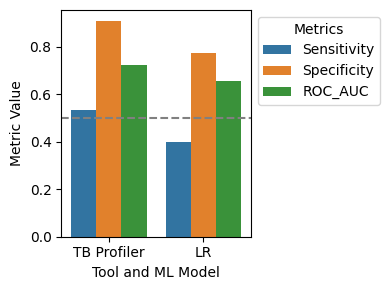

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the combined DataFrame for easier plotting
melted_combined_df = pd.melt(combined_results_df_UG, id_vars=['Model'],
                              value_vars=['Sensitivity', 'Specificity', 'ROC_AUC'],
                              var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(4, 3))
sns.barplot(data=melted_combined_df, x='Model', y='Value', hue='Metric')
#plt.title('Comparison of performance of the ML Models and Existing tools')
plt.ylabel('Metric Value')
plt.xlabel('Tool and ML Model')
plt.axhline(0.5, color='gray', linestyle='--')  # Optional: reference line for 0.5
#plt.legend(title='Metrics')
# Move the legend outside of the plot
plt.legend(title='Metrics',loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the coordinates to move the legend
plt.tight_layout()
# Save the plot with high resolution
plt.savefig('STM_Bench_marking_UG.png', dpi=300)
plt.show()


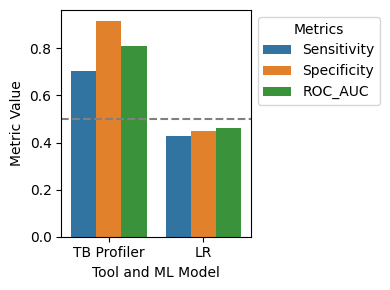

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the combined DataFrame for easier plotting
melted_combined_df = pd.melt(combined_results_df_SA, id_vars=['Model'],
                              value_vars=['Sensitivity', 'Specificity', 'ROC_AUC'],
                              var_name='Metric', value_name='Value')

# Plotting
plt.figure(figsize=(4, 3))
sns.barplot(data=melted_combined_df, x='Model', y='Value', hue='Metric')
#plt.title('Comparison of performance of the ML Models and Existing tools')
plt.ylabel('Metric Value')
plt.xlabel('Tool and ML Model')
plt.axhline(0.5, color='gray', linestyle='--')  # Optional: reference line for 0.5
#plt.legend(title='Metrics')
# Move the legend outside of the plot
plt.legend(title='Metrics',loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the coordinates to move the legend
plt.tight_layout()
# Save the plot with high resolution
plt.savefig('STM_Bench_marking_SA.png', dpi=300)
plt.show()
